In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import*
import math
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

In [2]:
def get_stock_data(normalized=0):
    #url = "EDELWEISSNS.CSV"
    #stocks=pd.read_csv('C:/Users/Debjyoti/Desktop/dataset/EDELWEISS.csv')
    url = "https://raw.githubusercontent.com/saranshmanu/Stock-Market-Analysis-using-ANN/master/EDELWEISSNS.csv"
    col_names = ['Date','Open','High','Low','Close','Volume','Adj Close']
    stocks = pd.read_csv(url, header=0, names=col_names) 
    df = pd.DataFrame(stocks)
    date_split = df['Date'].str.split('-').str
    df['Year'], df['Month'], df['Day'] = date_split
    df["Volume"] = df["Volume"] / 10000
    return df

In [3]:
df = get_stock_data(0)
df.head()

<ipython-input-2-3c4c7b796c9e>:9: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Year'], df['Month'], df['Day'] = date_split


,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
0,2008-10-03,41.299999,41.685001,39.400002,40.525002,0.002930,185090.0,2008,10,03
1,2008-10-06,39.700001,40.799999,37.200001,39.564999,0.002860,204340.0,2008,10,06
2,2008-10-07,40.000000,40.599998,36.000000,36.119999,0.002611,128970.0,2008,10,07
3,2008-10-08,35.000000,44.400002,34.500000,40.880001,0.002955,700490.0,2008,10,08
4,2008-10-10,40.400002,40.400002,35.299999,37.910000,0.002741,367380.0,2008,10,10


In [4]:
df.drop(df.columns[[0,3,6,7,8,9]], axis=1, inplace=True)
df.head()

,Open,High,Close,Volume
0,41.299999,41.685001,40.525002,0.002930
1,39.700001,40.799999,39.564999,0.002860
2,40.000000,40.599998,36.119999,0.002611
3,35.000000,44.400002,40.880001,0.002955
4,40.400002,40.400002,37.910000,0.002741


In [5]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']*100
df['Close'] = df['Close']/100
print(df)
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

       Open     High    Close    Volume
0     0.413  0.41685  0.40525  0.292964
1     0.397  0.40800  0.39565  0.286023
2     0.400  0.40600  0.36120  0.261119
3     0.350  0.44400  0.40880  0.295530
4     0.404  0.40400  0.37910  0.274059
...     ...      ...      ...       ...
2462  2.180  2.21000  2.18550  2.185500
2463  2.215  2.21500  2.12150  2.121500
2464  2.132  2.14450  1.89400  1.894000
2465  1.914  1.98850  1.89500  1.895000
2466  1.890  1.90900  1.87000  1.870000

[2467 rows x 4 columns]


In [6]:
X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [7]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (1973, 3)
y_train (1973, 1)
X_test (494, 3)
y_test (494, 1)


In [8]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split=0.05)

Epoch 1/10
15/15 [==============================] - 10s 396ms/step - loss: 0.1872 - val_loss: 0.8221
Epoch 2/10
15/15 [==============================] - 0s 10ms/step - loss: 0.1712 - val_loss: 0.7845
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 0.1578 - val_loss: 0.7291
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 0.1356 - val_loss: 0.6406
Epoch 5/10
15/15 [==============================] - 0s 8ms/step - loss: 0.1068 - val_loss: 0.5095
Epoch 6/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0679 - val_loss: 0.3464
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0298 - val_loss: 0.1910
Epoch 8/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0105 - val_loss: 0.0981
Epoch 9/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.0767
Epoch 10/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0068 - val_loss: 0.0858


In [9]:
predictions = classifier.predict(X_test)
print(predictions[:10])

[[0.75910294]
 [0.75650704]
 [0.7523185 ]
 [0.75672305]
 [0.7520268 ]
 [0.7492764 ]
 [0.7411324 ]
 [0.7422404 ]
 [0.7428175 ]
 [0.7651347 ]]


In [10]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.01 MSE (0.10 RMSE)
Test Score: 1.29 MSE (1.13 RMSE)


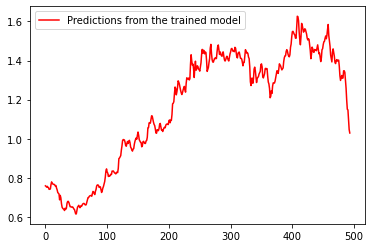

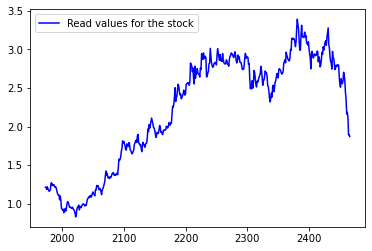

In [11]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()

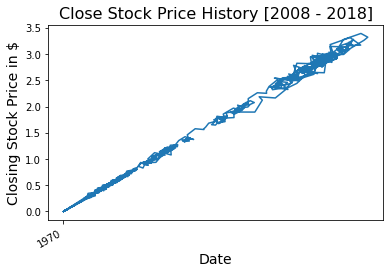

In [12]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Open'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2008 - 2018]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [13]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [14]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

In [15]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [16]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [17]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.0008168738843600455
Intercept:  -0.21356265034935595


<ipython-input-18-f46d15fbfb1c>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Slope: ', np.asscalar(np.squeeze(model.coef_)))


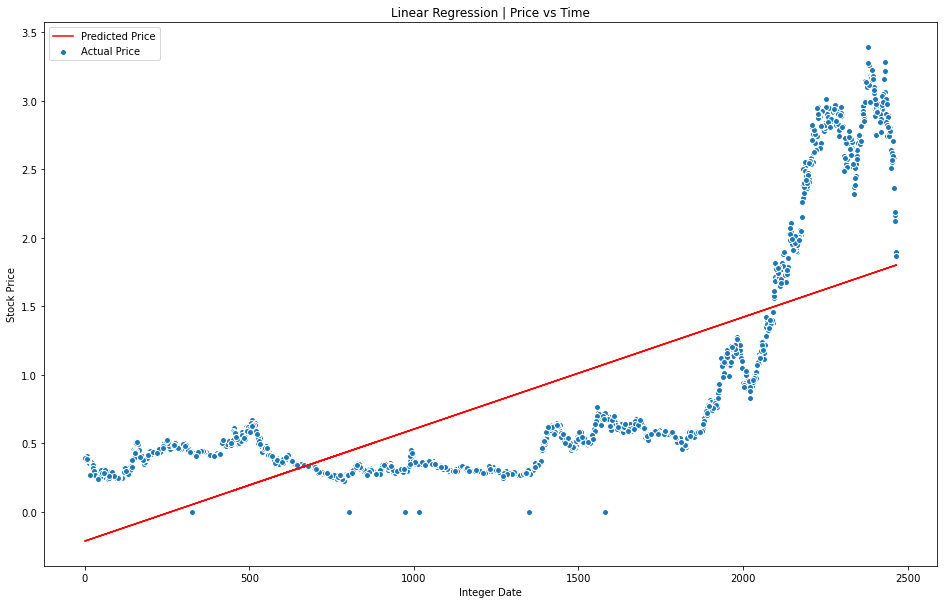

In [19]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [20]:

# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [21]:

# Generate array with predicted values
y_pred = model.predict(X_test)

In [22]:
# Get number of rows in data set for random sample
df.shape

(2467, 4)

In [23]:

# Generate 25 random numbers
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [24]:
df_sample.head()

,Open,High,Close,Volume
38,0.25500,0.2635,0.25645,0.185393
130,0.29500,0.3047,0.29285,0.211707
171,0.41265,0.4250,0.41270,0.298349
210,0.41100,0.4400,0.43270,0.337759
422,0.50120,0.5033,0.48125,0.418560


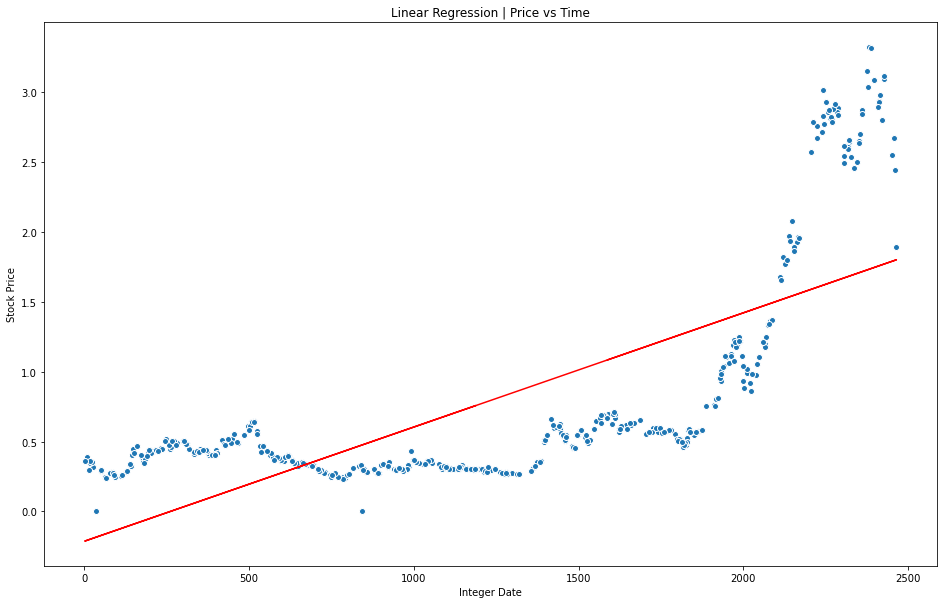

In [25]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price')

plt.show()

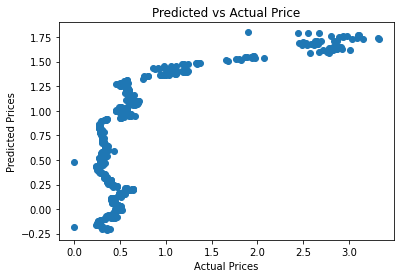

In [26]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

C:\Users\Debjyoti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


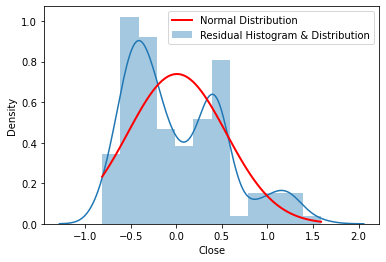

In [27]:
import seaborn as sns
# Import norm package to plot normal distribution
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [84]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [85]:
df.head()

,Open,High,Close,Volume,Prediction
0,0.413,0.41685,0.40525,0.292964,-0.197352
1,0.397,0.40800,0.39565,0.286023,-0.196543
2,0.400,0.40600,0.36120,0.261119,-0.195735
3,0.350,0.44400,0.40880,0.295530,-0.194926
4,0.404,0.40400,0.37910,0.274059,-0.194118


In [86]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [87]:
# Statistical summary of test data
df['Close'].describe()

count    2467.000000
mean        0.795167
std         0.795650
min         0.000000
25%         0.322250
50%         0.477000
75%         0.679000
max         3.392000
Name: Close, dtype: float64

In [48]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4610557034376206
Mean Squared Error: 0.2939447377868122
Root Mean Squared Error: 0.542166706638108


In [88]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.518967707660563


In [89]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.5197745753153652